In [1]:
import os
import pandas as pd

# Printing the current working directory
print(os.getcwd())

# Directory for importing the dataset
data_csv = pd.read_csv("C:\\Users\\HP\\Desktop\\Datamining\\assignment1\\dataset.csv")

# Displaying the first few rows of the dataset
data_csv.head()

c:\Users\HP\Desktop\Datamining\assignment1\jupyter\DMAT-assignment


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [2]:
#Checking for missing values in each column of dataset
missing_values = data_csv.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


Description of the dataset:
Calculating total counts who survived and not from the datatset
also, plotting numerical summary of each varaibles against frequency.


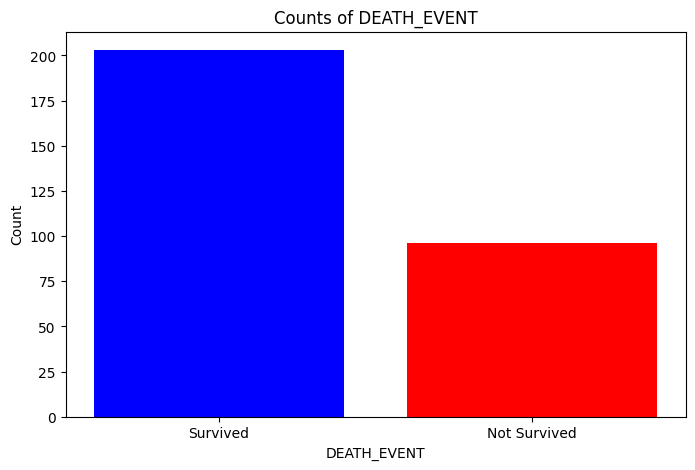

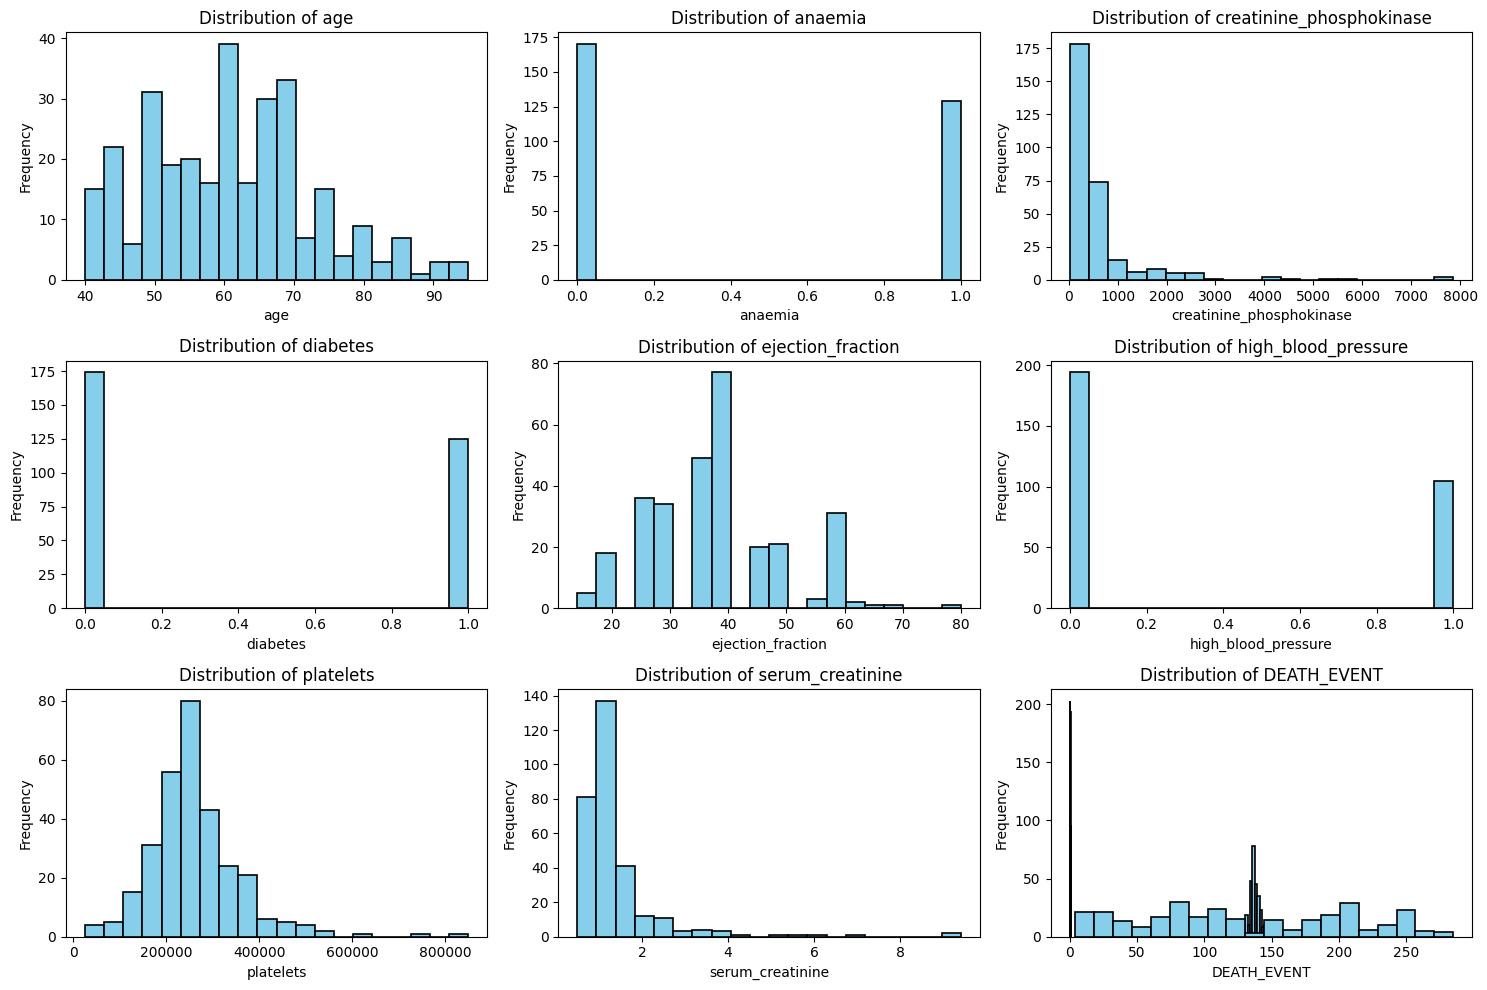

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt


#Calculating total counts for DEATH_EVENT
death_counts = data_csv['DEATH_EVENT'].value_counts()

#Plotting the total death counts
plt.figure(figsize=(8, 5))
plt.bar(death_counts.index, death_counts.values, color=['blue', 'red'])
plt.xlabel('DEATH_EVENT')
plt.ylabel('Count')
plt.title('Counts of DEATH_EVENT')
plt.xticks(death_counts.index, ['Survived', 'Not Survived'])
plt.show()


#Visualizing the distribution of numerical features
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_summary.columns):
    plt.subplot(3, 3, i + 1 if i < 8 else 9)  # Ensure subplot index is within the valid range
    plt.hist(data_csv[column], bins=20, color='skyblue', edgecolor='black', linewidth=1.2)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()